<a href="https://colab.research.google.com/github/HoseaGibson/NBA-Analysis-Part-2/blob/main/BasketBallPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NBA Data Part 2



##Imports

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Dataframes imported

In [25]:
# Import games_details.csv 
game_details_df = pd.read_csv('/content/games_details.csv')
game_df = pd.read_csv('/content/games.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Data Cleaning

- Check number of rows and columns
- View first 5 rows
- Get and view column names
- Check for null values and missing data
- Remove columns that will not need for analysis


In [5]:
game_details_df.shape

(30291, 29)

In [6]:
game_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484.0,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398.0,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655.0,Daniel Gafford,Daniel,C,NaN,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078.0,Bradley Beal,Bradley,G,NaN,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915.0,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [7]:
game_details_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [8]:
game_details_df.isnull().sum()

GAME_ID                  0
TEAM_ID                  0
TEAM_ABBREVIATION        0
TEAM_CITY                0
PLAYER_ID                1
PLAYER_NAME              1
NICKNAME             19806
START_POSITION       19380
COMMENT              23918
MIN                   6374
FGM                   6374
FGA                   6374
FG_PCT                6374
FG3M                  6374
FG3A                  6374
FG3_PCT               6374
FTM                   6374
FTA                   6374
FT_PCT                6374
OREB                  6374
DREB                  6374
REB                   6374
AST                   6374
STL                   6374
BLK                   6374
TO                    6374
PF                    6374
PTS                   6374
PLUS_MINUS            6374
dtype: int64

In [16]:
final_df = game_details_df[['TEAM_ABBREVIATION', 'TEAM_CITY',
       'PLAYER_NAME', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS']]

In [17]:
final_df.head()

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,WAS,Washington,Kentavious Caldwell-Pope,27:41,1.0,6.0,0.167,0.0,5.0,0.000,1.0,1.0,1.0,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0
1,WAS,Washington,Kyle Kuzma,30:28,2.0,12.0,0.167,1.0,8.0,0.125,0.0,0.0,0.0,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0
2,WAS,Washington,Daniel Gafford,24:21,9.0,12.0,0.750,0.0,0.0,0.000,2.0,5.0,0.4,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0
3,WAS,Washington,Bradley Beal,35:07,9.0,20.0,0.450,5.0,11.0,0.455,1.0,1.0,1.0,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0
4,WAS,Washington,Spencer Dinwiddie,28:34,0.0,5.0,0.000,0.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0


In [18]:
final_df.isnull().sum()

TEAM_ABBREVIATION       0
TEAM_CITY               0
PLAYER_NAME             1
MIN                  6374
FGM                  6374
FGA                  6374
FG_PCT               6374
FG3M                 6374
FG3A                 6374
FG3_PCT              6374
FTM                  6374
FTA                  6374
FT_PCT               6374
OREB                 6374
DREB                 6374
REB                  6374
AST                  6374
STL                  6374
BLK                  6374
TO                   6374
PF                   6374
PTS                  6374
dtype: int64

In [19]:
final_df.shape

(30291, 22)

In [38]:
df = final_df.dropna(thresh=6)

In [39]:
df.shape

(23917, 22)

In [40]:
df.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
count,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000,23917.000000
mean,3.721746,8.075218,0.425021,1.142785,3.185558,0.254349,1.506209,1.945436,0.409798,0.906719,3.167287,4.074006,2.215286,0.709119,0.446461,1.225990,1.758665,10.092487
std,3.167993,5.951656,0.255734,1.471412,3.023923,0.293083,2.163770,2.613359,0.434481,1.306495,2.750144,3.445251,2.537167,0.945879,0.801004,1.403314,1.438617,8.494815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,0.273000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,3.000000,7.000000,0.444000,1.000000,3.000000,0.200000,1.000000,1.000000,0.250000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000
75%,6.000000,11.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,1.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000
max,21.000000,37.000000,1.000000,12.000000,22.000000,1.000000,18.000000,21.000000,1.000000,12.000000,20.000000,30.000000,24.000000,10.000000,9.000000,10.000000,6.000000,60.000000


##EDA

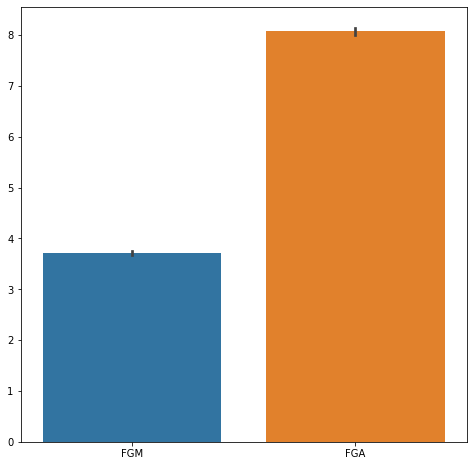

In [62]:
plt.figure(figsize = (8,8))
sns.barplot(data=df[['FGM',
       'FGA']])

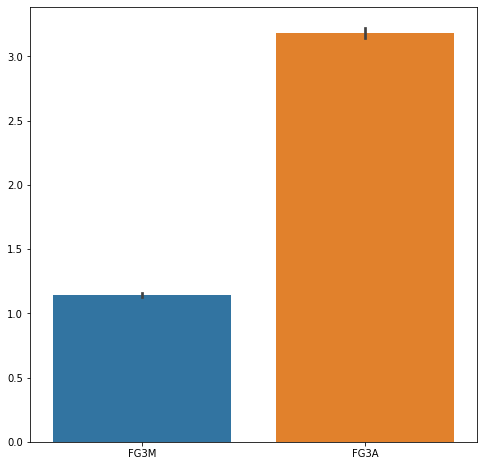

In [61]:
plt.figure(figsize = (8,8))
sns.barplot(data=df[['FG3M', 'FG3A']])

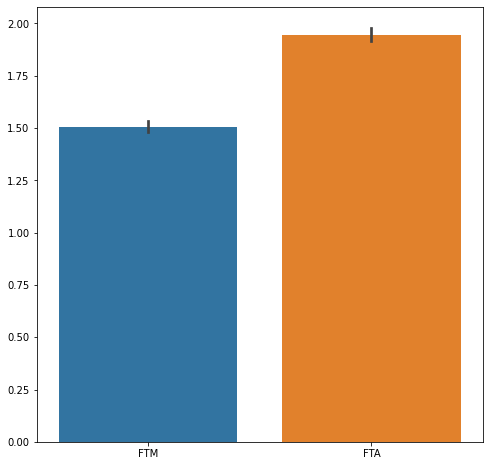

In [59]:
plt.figure(figsize = (8,8))
sns.barplot(data=df[['FTM', 'FTA']])

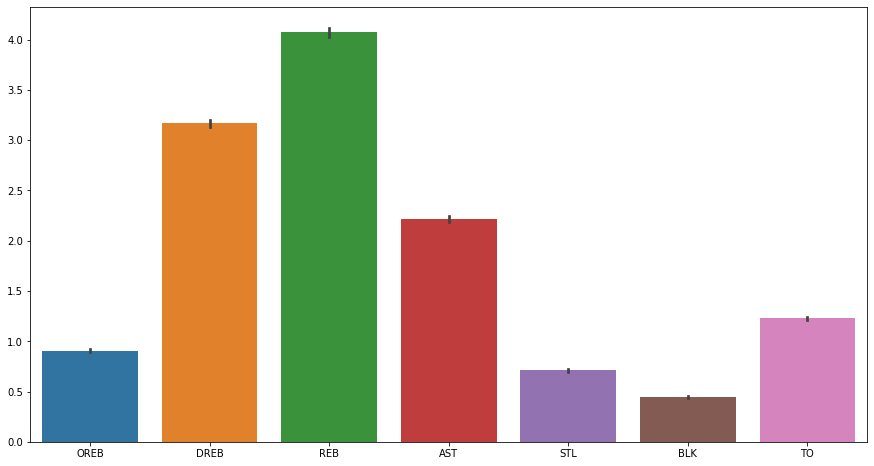

In [58]:

plt.figure(figsize = (15,8))
sns.barplot(data=df[['OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO']])

In [69]:
df[(df['PTS'] >= 30)]

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
51,BOS,Boston,Jayson Tatum,37:46,12.0,22.0,0.545,5.0,12.0,0.417,5.0,6.0,0.833,3.0,6.0,9.0,5.0,0.0,1.0,4.0,2.0,34.0
119,MIA,Miami,Jimmy Butler,36:33,10.0,18.0,0.556,1.0,2.0,0.500,10.0,12.0,0.833,2.0,8.0,10.0,10.0,0.0,1.0,3.0,1.0,31.0
171,MIL,Milwaukee,Giannis Antetokounmpo,36:17,18.0,23.0,0.783,3.0,4.0,0.750,8.0,11.0,0.727,2.0,7.0,9.0,3.0,1.0,1.0,4.0,1.0,47.0
222,OKC,Oklahoma City,Luguentz Dort,36:35,14.0,22.0,0.636,4.0,11.0,0.364,2.0,4.0,0.500,3.0,5.0,8.0,2.0,0.0,1.0,1.0,4.0,34.0
265,CHI,Chicago,Zach LaVine,37:22,11.0,20.0,0.550,7.0,12.0,0.583,1.0,2.0,0.500,0.0,6.0,6.0,2.0,0.0,1.0,4.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30247,WAS,Washington,Bradley Beal,44:14,12.0,24.0,0.500,2.0,5.0,0.400,7.0,9.0,0.778,0.0,7.0,7.0,6.0,3.0,0.0,5.0,2.0,33.0
30248,WAS,Washington,Russell Westbrook,44:15,13.0,25.0,0.520,0.0,1.0,0.000,6.0,12.0,0.500,1.0,13.0,14.0,9.0,0.0,0.0,2.0,5.0,32.0
30258,LAL,Los Angeles,LeBron James,43:15,14.0,29.0,0.483,2.0,10.0,0.200,1.0,3.0,0.333,0.0,9.0,9.0,13.0,1.0,0.0,8.0,2.0,31.0
30272,BOS,Boston,Jayson Tatum,41:00,10.0,24.0,0.417,3.0,7.0,0.429,9.0,13.0,0.692,1.0,8.0,9.0,2.0,2.0,0.0,1.0,4.0,32.0


In [112]:
LJ_KD_df = df[df['PLAYER_NAME'].isin(['LeBron James','Kevin Durant'])]
LB_df = df[df['PLAYER_NAME'].isin(['LeBron James'])]
KD_df = df[df['PLAYER_NAME'].isin(['Kevin Durant'])]

In [113]:
LB_df.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,8.861111,18.027778,0.490333,2.305556,6.361111,0.354222,3.333333,4.722222,0.705083,0.861111,5.805556,6.666667,7.222222,1.472222,0.583333,3.750000,1.500000,23.361111
std,3.006211,4.930871,0.084600,1.450506,2.416051,0.157607,1.740279,2.397750,0.228168,0.960737,2.765289,3.070598,2.542340,1.133543,0.806226,1.746425,1.253566,6.551566
min,3.000000,6.000000,0.316000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,9.000000
25%,7.000000,13.000000,0.442500,1.000000,4.750000,0.237500,2.000000,3.000000,0.553250,0.000000,4.000000,4.750000,5.750000,1.000000,0.000000,2.750000,1.000000,19.000000
50%,8.000000,19.000000,0.480500,2.000000,5.500000,0.400000,3.000000,5.000000,0.690500,1.000000,6.000000,6.500000,7.000000,1.000000,0.000000,4.000000,1.000000,23.500000
75%,11.000000,22.000000,0.553250,3.000000,8.250000,0.446750,4.250000,6.000000,0.874750,1.000000,7.000000,9.000000,9.250000,2.000000,1.000000,5.000000,2.000000,26.500000
max,16.000000,29.000000,0.667000,6.000000,11.000000,0.600000,7.000000,11.000000,1.000000,4.000000,11.000000,12.000000,13.000000,4.000000,3.000000,8.000000,5.000000,38.000000


In [116]:
KD_df.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,9.961538,18.403846,0.572635,2.326923,5.250000,0.499731,5.846154,6.692308,0.828231,0.442308,7.173077,7.615385,4.884615,0.865385,0.980769,3.153846,1.692308,28.096154
std,3.372097,6.669390,0.161131,1.309410,2.535048,0.263821,3.164662,3.293121,0.241433,0.639039,3.282283,3.396387,2.860508,1.010316,0.980004,1.819121,1.321592,8.518169
min,3.000000,3.000000,0.235000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,8.000000,14.000000,0.475000,1.000000,3.000000,0.333000,3.750000,4.000000,0.750000,0.000000,4.000000,5.000000,3.000000,0.000000,0.000000,2.000000,1.000000,22.750000
50%,9.000000,17.500000,0.542000,2.000000,6.000000,0.500000,6.000000,6.000000,0.882000,0.000000,7.000000,7.500000,4.000000,1.000000,1.000000,3.000000,1.000000,29.000000
75%,12.000000,23.250000,0.673250,3.000000,6.250000,0.667000,8.000000,9.000000,1.000000,1.000000,10.000000,10.000000,6.000000,1.000000,1.250000,4.000000,3.000000,32.000000
max,17.000000,36.000000,1.000000,7.000000,13.000000,1.000000,13.000000,16.000000,1.000000,3.000000,17.000000,17.000000,13.000000,4.000000,4.000000,8.000000,5.000000,49.000000


In [109]:
LJ_KD_df.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,9.511364,18.250000,0.538966,2.318182,5.704545,0.440205,4.818182,5.886364,0.777852,0.613636,6.613636,7.227273,5.840909,1.113636,0.818182,3.397727,1.613636,26.159091
std,3.255391,5.990893,0.140553,1.360742,2.533269,0.236582,2.938236,3.101471,0.242533,0.808458,3.138313,3.282581,2.955168,1.097875,0.929039,1.803826,1.290387,8.079898
min,3.000000,3.000000,0.235000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,7.000000,13.750000,0.453750,1.000000,4.000000,0.296500,3.000000,4.000000,0.667000,0.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.000000,1.000000,21.000000
50%,9.000000,18.000000,0.500000,2.000000,6.000000,0.429000,4.000000,6.000000,0.833000,0.000000,6.500000,7.000000,5.000000,1.000000,1.000000,3.000000,1.000000,25.000000
75%,11.000000,22.000000,0.616000,3.000000,7.250000,0.509500,6.000000,7.000000,1.000000,1.000000,9.000000,10.000000,8.000000,2.000000,1.000000,4.250000,2.250000,31.000000
max,17.000000,36.000000,1.000000,7.000000,13.000000,1.000000,13.000000,16.000000,1.000000,4.000000,17.000000,17.000000,13.000000,4.000000,4.000000,8.000000,5.000000,49.000000


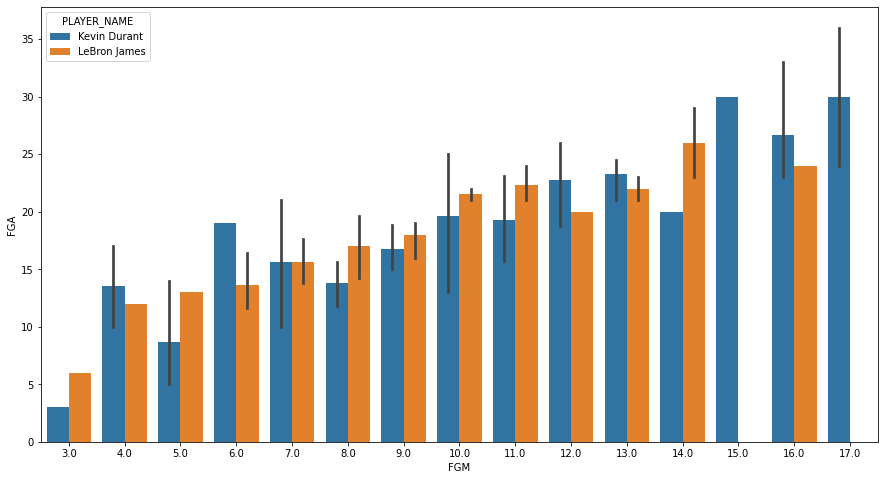

In [101]:
plt.figure(figsize = (15,8))
sns.barplot(data=LJ_KD_df, x='FGM', y='FGA',hue='PLAYER_NAME')

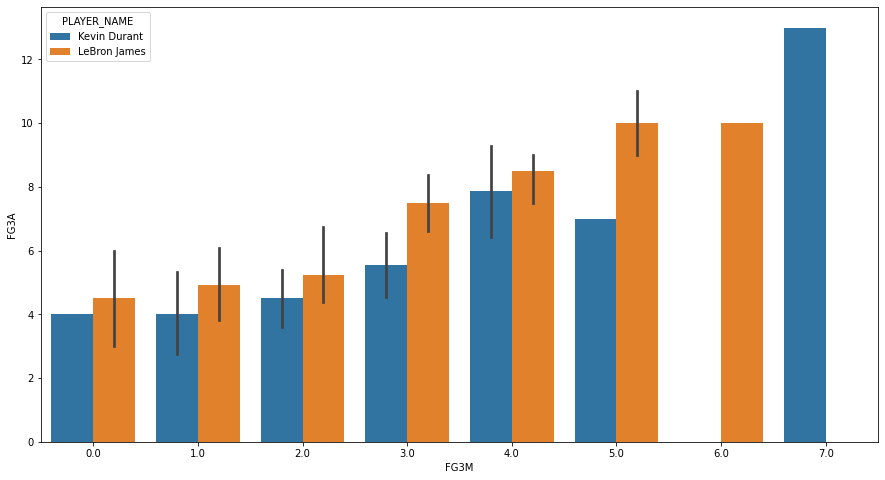

In [102]:
plt.figure(figsize = (15,8))
sns.barplot(data=LJ_KD_df, x='FG3M', y='FG3A',hue='PLAYER_NAME')

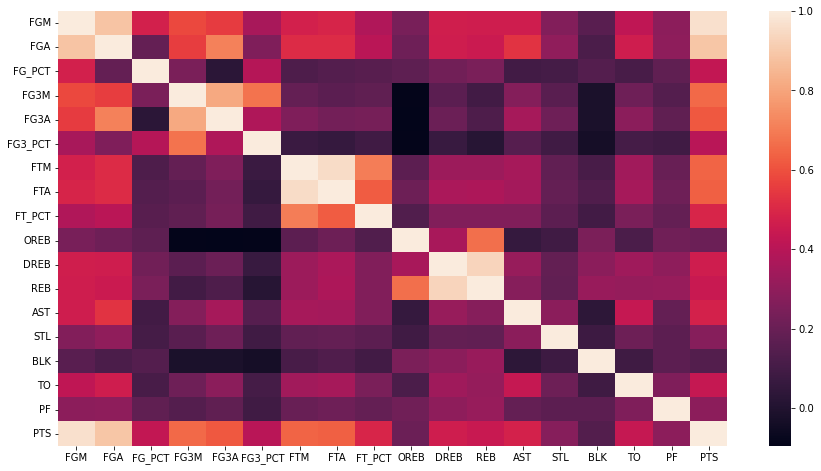

In [124]:
plt.figure(figsize = (15,8))
corr = df.corr()
sns.heatmap(corr)

##Findings - Comparison with Lebron James and Kevin Durant
- With close to the same average of FGA Durant makes more shots than LeBron
- Lebron and Durant both average around the same 3 point field goal made
- Lebron by a wide margin averages more OREB than Durant
- Durant has advantage on REB, DREB, STL, and BLK over Lebron

- Overall even though both players are farely close to one another, I would believe that Kevin Durant has a slight advantage over Lebron James. If Lebron and Kevin were the last two people to pick for a team, either one of them would be a great pick up "No one is getting the bad end of the stick".
